<a href="https://colab.research.google.com/github/jieun0441/Stimulus-Payment/blob/main/Graph_based_on_simulation_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# For Colab Use
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Package loading
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel("/content/drive/MyDrive/SP/Simulation results_several scenarios.xlsx")

In [7]:
df

,Unnamed: 0,Week,Predicted with Restriction Scenario,with Geographic Restrictions,Without Geographic Restrictions_Lower Bound1017_20,Without Geographic Restrictions_Lower Bound19,Without Geographic Restrictions_Upper Bound19,Midpoint of Without Geographic Restriction
0,0,week_20,40.195160,30,40.195160,40.195160,40.195160,40.195160
1,1,week_21,40.904715,87,31.261900,49.607993,59.046483,54.327238
2,2,week_22,44.123944,113,30.524673,54.330090,80.762364,67.546227
3,3,week_23,71.111911,127,40.231287,85.679210,162.767465,124.223338
4,4,week_24,71.020298,98,33.343752,106.654997,232.239997,169.447497
5,5,week_25,85.520092,77,34.778975,165.870994,425.086493,295.478744
6,6,week_26,89.660586,67,40.402331,245.345532,750.336722,497.841127
7,7,week_27,82.822884,43,32.329068,356.427779,1154.269662,755.348721
8,8,week_28,87.293886,57,44.398705,437.803243,1715.445380,1076.624311
9,9,week_29,86.743285,88,40.782038,581.892391,2526.549169,1554.220780


In [9]:
df.columns

Index(['Unnamed: 0', 'Week', 'Predicted with Restriction Scenario',
       'with Geographic Restrictions',
       'Without Geographic Restrictions_Lower Bound1017_20',
       'Without Geographic Restrictions_Lower Bound19',
       'Without Geographic Restrictions_Upper Bound19',
       'Midpoint of Without Geographic Restriction'],
      dtype='object')

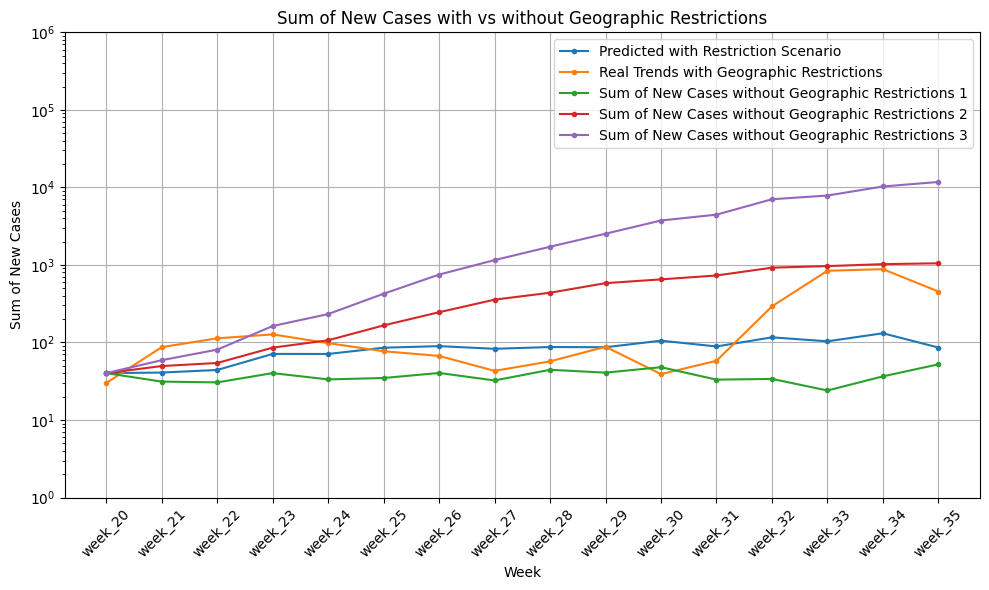

In [17]:
#@title Plotting Real Case Trend with a logarithmic scale
# Merge the two dataframes on the 'Week' column
plt.figure(figsize = (10,6))
plt.plot(df['Week'], df['Predicted with Restriction Scenario'], marker = 'o', markersize = 3, linestyle = '-', label = 'Predicted with Restriction Scenario')
plt.plot(df['Week'], df['with Geographic Restrictions'], marker = 'o', markersize = 3, linestyle = '-', label = 'Real Trends with Geographic Restrictions')
plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound1017_20'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 1')
plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound19'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 2')
plt.plot(df['Week'], df['Without Geographic Restrictions_Upper Bound19'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 3')
# plt.plot(df['Week'], df['Midpoint of Without Geographic Restriction'], marker = 'o', linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 4')
plt.xlabel('Week')
plt.ylabel('Sum of New Cases')
plt.title('Sum of New Cases with vs without Geographic Restrictions')
plt.yscale('log') # Set y-axis to lagrithmic scale
plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set custom y-axis ticks
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

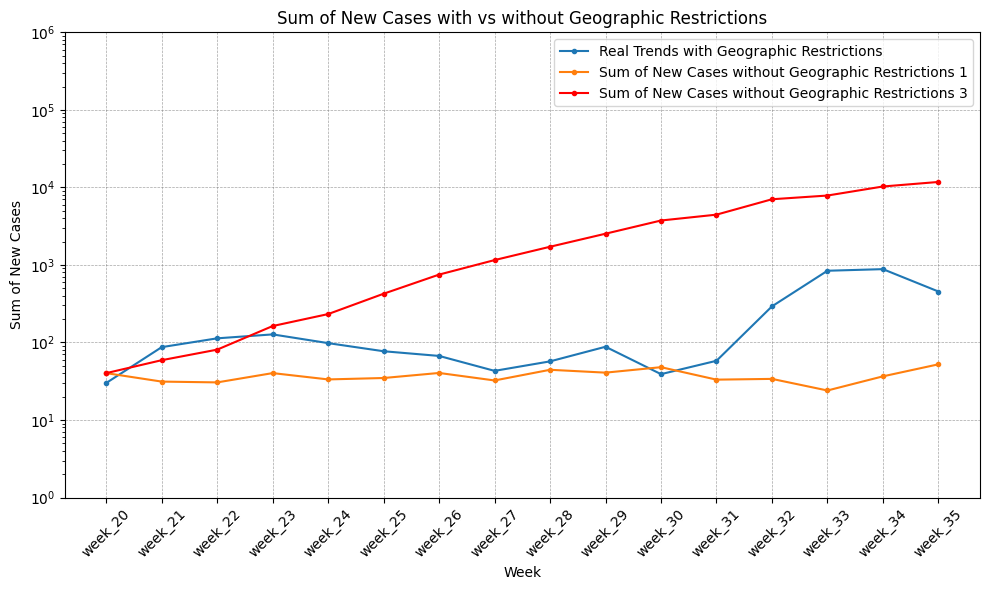

In [24]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Your existing plotting code
plt.figure(figsize=(10, 6))
plt.plot(df['Week'], df['with Geographic Restrictions'], marker='o', markersize=3, linestyle='-', label='Real Trends with Geographic Restrictions')
plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound1017_20'], marker='o', markersize=3, linestyle='-', label='Sum of New Cases without Geographic Restrictions 1')
plt.plot(df['Week'], df['Without Geographic Restrictions_Upper Bound19'], marker='o', markersize=3, linestyle='-', color='red', label='Sum of New Cases without Geographic Restrictions 3')
plt.xlabel('Week')
plt.ylabel('Sum of New Cases')
plt.title('Sum of New Cases with vs without Geographic Restrictions')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set custom y-axis ticks
plt.xticks(rotation=45)
plt.legend()

# Create the grid for vertical lines
plt.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add horizontal grid lines only at 10^x intervals
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
ax.grid(True, which='major', axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

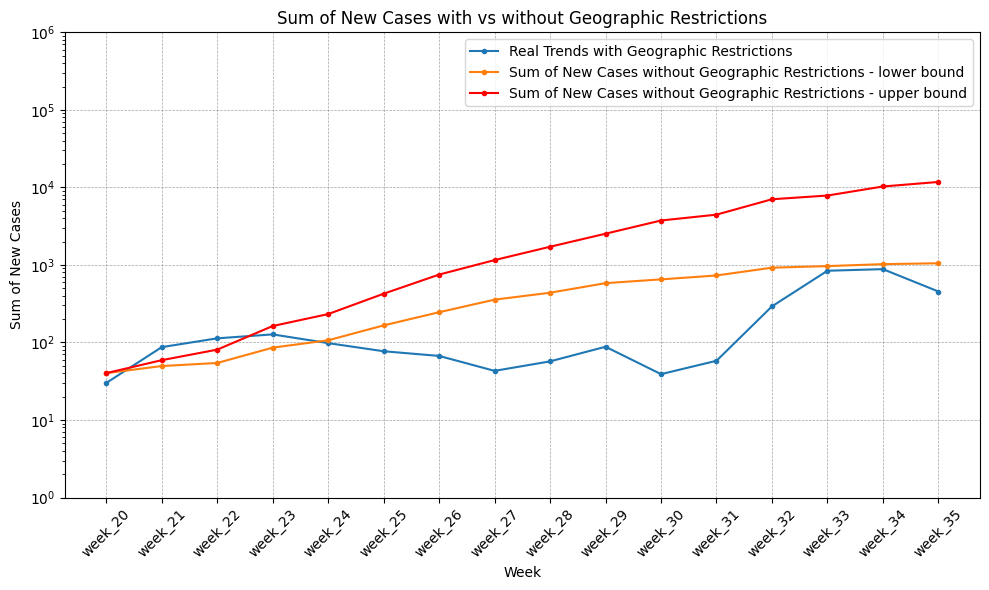

In [25]:
#@title Plotting Real Case Trend with a logarithmic scale
# Merge the two dataframes on the 'Week' column
plt.figure(figsize = (10,6))
# plt.plot(df['Week'], df['Predicted with Restriction Scenario'], marker = 'o', markersize = 3, linestyle = '-', label = 'Predicted with Restriction Scenario')
plt.plot(df['Week'], df['with Geographic Restrictions'], marker = 'o', markersize = 3, linestyle = '-', label = 'Real Trends with Geographic Restrictions')
# plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound1017_20'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 1')
plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound19'], marker = 'o', markersize = 3, linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions - lower bound')
plt.plot(df['Week'], df['Without Geographic Restrictions_Upper Bound19'], marker = 'o', markersize = 3, linestyle = '-', color = 'red', label = 'Sum of New Cases without Geographic Restrictions - upper bound')
# plt.plot(df['Week'], df['Midpoint of Without Geographic Restriction'], marker = 'o', linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions 4')
plt.xlabel('Week')
plt.ylabel('Sum of New Cases')
plt.title('Sum of New Cases with vs without Geographic Restrictions')
plt.yscale('log') # Set y-axis to lagrithmic scale
plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set custom y-axis ticks
plt.xticks(rotation = 45)
plt.legend()

# Create the grid for vertical lines
plt.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add horizontal grid lines only at 10^x intervals
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
ax.grid(True, which='major', axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

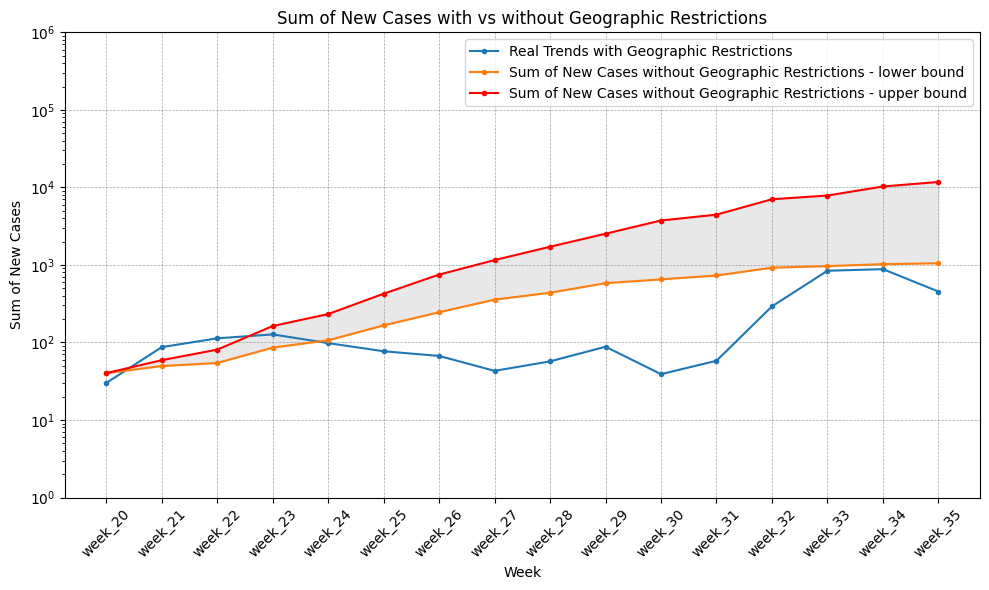

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Your existing plotting code
plt.figure(figsize=(10, 6))
# plt.plot(df['Week'], df['Predicted with Restriction Scenario'], marker='o', markersize=3, linestyle='-', label='Predicted with Restriction Scenario')
plt.plot(df['Week'], df['with Geographic Restrictions'], marker='o', markersize=3, linestyle='-', label='Real Trends with Geographic Restrictions')
# plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound1017_20'], marker='o', markersize=3, linestyle='-', label='Sum of New Cases without Geographic Restrictions 1')
plt.plot(df['Week'], df['Without Geographic Restrictions_Lower Bound19'], marker='o', markersize=3, linestyle='-', label='Sum of New Cases without Geographic Restrictions - lower bound')
plt.plot(df['Week'], df['Without Geographic Restrictions_Upper Bound19'], marker='o', markersize=3, linestyle='-', color='red', label='Sum of New Cases without Geographic Restrictions - upper bound')
# plt.plot(df['Week'], df['Midpoint of Without Geographic Restriction'], marker='o', linestyle='-', label='Sum of New Cases without Geographic Restrictions 4')
plt.xlabel('Week')
plt.ylabel('Sum of New Cases')
plt.title('Sum of New Cases with vs without Geographic Restrictions')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set custom y-axis ticks
plt.xticks(rotation=45)
plt.legend()

# Create the grid for vertical lines
plt.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add horizontal grid lines only at 10^x intervals
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
ax.grid(True, which='major', axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Fill the area between the lower and upper bounds
plt.fill_between(df['Week'], df['Without Geographic Restrictions_Lower Bound19'], df['Without Geographic Restrictions_Upper Bound19'], color='lightgray', alpha=0.5)
plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set custom y-axis ticks
plt.tight_layout()
plt.show()
